In [74]:
import pandas as pd 
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# Set option max columns display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

In [75]:
df_ss = pd.read_csv('sample_submission.csv')

# EDA

In [99]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.drop(columns = 'Unnamed: 0')
df_test = df_test.drop(columns = 'Unnamed: 0')
df_train['Incident Datetime'] = pd.to_datetime(df_train['Incident Datetime'])
df_test['Incident Datetime'] = pd.to_datetime(df_test['Incident Datetime'])

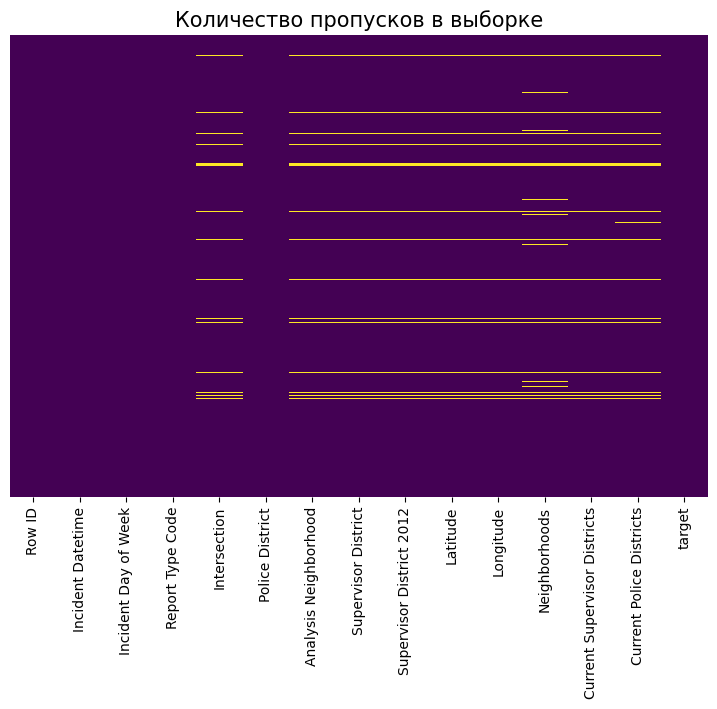

In [78]:
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Количество пропусков в выборке', fontsize=15)
sns_heatmap = sns.heatmap(df_train.isnull(),
                          yticklabels=False,
                          cbar=False,
                          cmap='viridis')

In [112]:
fillna_cols = ['Supervisor District',
       'Supervisor District 2012', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts']


df_train[fillna_cols] = df_train[fillna_cols].fillna(9999).astype(int)
df_test[fillna_cols] = df_test[fillna_cols].fillna(9999).astype(int)

In [94]:
# dtype = {'Supervisor District' : int,
#         'Supervisor District 2012': int,
#         'Neighborhoods': int, 
#         'Current Supervisor Districts' : int,
#         'Current Police Districts': int
#         }

In [113]:
# описательная таблица
def descr_table(df: pd.DataFrame) -> pd.DataFrame:
    list_item = []
    for col in df.columns:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
    desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
    return desc_df


In [114]:
descr_table(df_train)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Row ID,int64,0,0.000000,391750,"[86814469434, 112210668395, 79810969452, 12778..."
1,Incident Datetime,object,0,0.000000,245975,"[2019-11-08 14:00:00, 2022-02-15 16:30:00, 201..."
2,Incident Day of Week,object,0,0.000000,7,"[Friday, Tuesday, Sunday, Saturday]"
3,Report Type Code,object,0,0.000000,4,"[IS, II, VS, VI]"
4,Intersection,object,17129,4.372431,6364,"[MARKET ST \ POWELL ST, FRESNO ST \ GRANT AVE,..."
5,Police District,object,0,0.000000,11,"[Tenderloin, Central, Ingleside, Mission]"
6,Analysis Neighborhood,object,17225,4.396937,41,"[Financial District/South Beach, North Beach, ..."
7,Supervisor District,int64,0,0.000000,12,"[6, 3, 11, 9]"
8,Supervisor District 2012,int64,0,0.000000,12,"[3, 11, 10, 8]"
9,Latitude,float64,17129,4.372431,6451,"[37.784560141211806, 37.79848980264107, 37.797..."


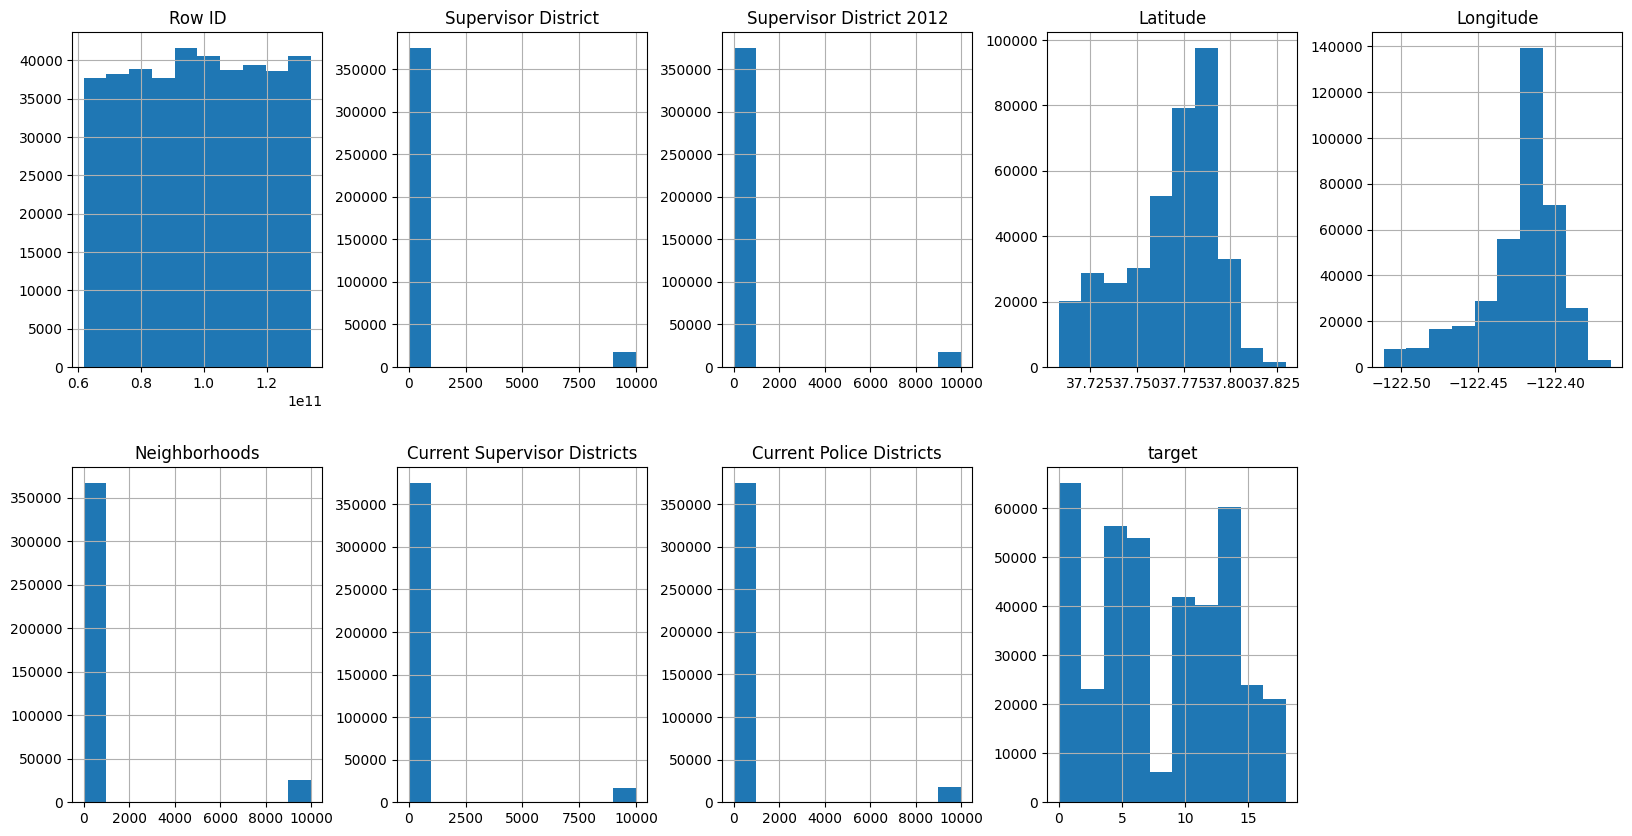

In [115]:
df_train.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

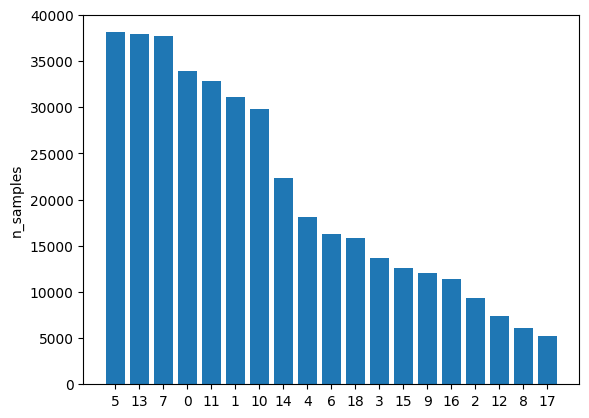

In [82]:
# ДИЗбаланс классов
dfg = df_train['target'].value_counts(dropna=False).reset_index().sort_values(by='count', ascending=False)
plt.bar(dfg['target'].astype(str), dfg['count'])
plt.ylabel("n_samples")
# plt.ylim([0, 75])
plt.show()

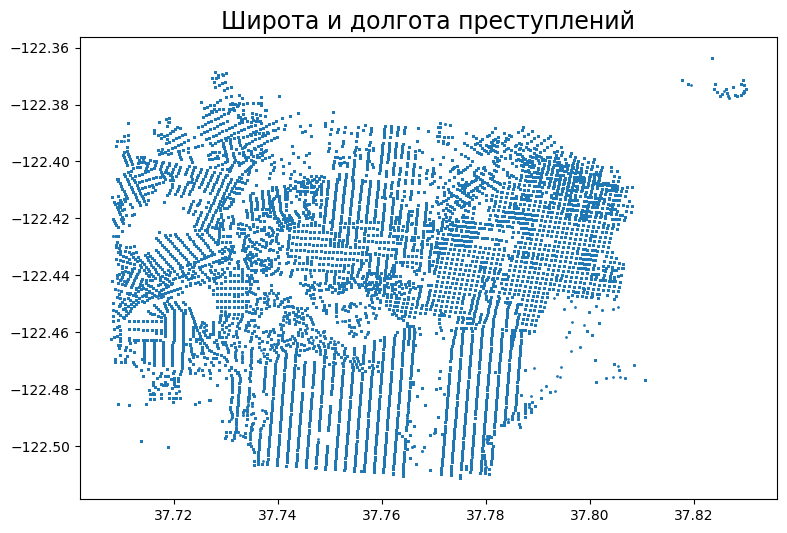

In [83]:
plt.figure(figsize = (9, 6))
plt.scatter(df_train['Latitude'], df_train['Longitude'], s=1)
plt.title('Широта и долгота преступлений', fontsize=17)

plt.show()

In [19]:
# как будто хорошо будет натравить сюда UMAP

In [117]:
df_train.head()

,Row ID,Incident Datetime,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,target
0,86814469434,2019-11-08 14:00:00,Friday,IS,MARKET ST \ POWELL ST,Tenderloin,Financial District/South Beach,6,3,37.784560,-122.407337,19,3,5,1
1,112210668395,2022-02-15 16:30:00,Tuesday,II,FRESNO ST \ GRANT AVE,Central,North Beach,3,3,37.798490,-122.407149,106,3,6,0
2,79810969452,2019-05-05 03:30:00,Sunday,IS,OSGOOD PL \ PACIFIC AVE,Central,North Beach,3,3,37.797396,-122.402887,106,3,6,1
3,127781292541,2023-05-20 18:00:00,Saturday,II,GENEVA AVE \ MOSCOW ST \ SOUTH HILL BLVD,Ingleside,Excelsior,11,11,37.713143,-122.433707,58,1,9,7
4,73242481031,2018-10-30 02:31:00,Tuesday,IS,THORNTON AVE \ BAY SHORE BLVD \ CARROLL AVE,Ingleside,Portola,9,10,37.730658,-122.403400,91,9,2,3


## Фик корреляция

In [ ]:
import phik

In [134]:
dataset = df_train.drop(columns = ['Incident Datetime', 'Row ID']).sample(500)

In [135]:
phik_df = dataset.phik_matrix(interval_cols=['Latitude', 'Longitude'])

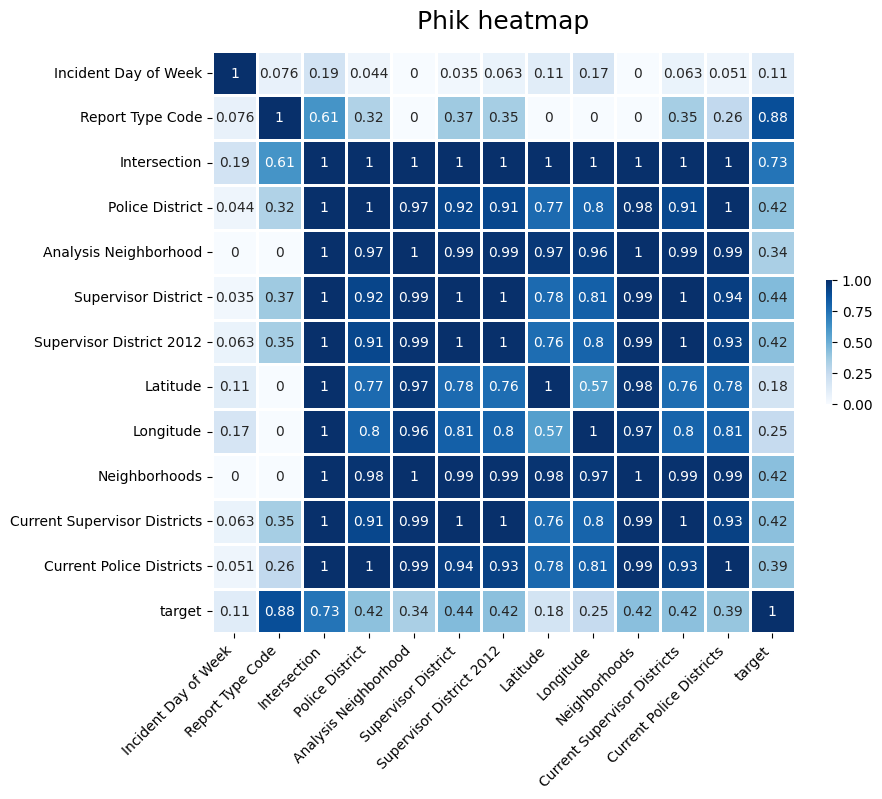

In [147]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(phik_df,
                      annot=True,
                        square=True,
                        cmap="Blues",
                        vmax=1,
                        vmin=0,
                        cbar_kws={"fraction": 0.01},  # shrink colour bar
                        linewidth=2,)
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Phik heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

# Models

In [2]:
import catboost

In [26]:
model = catboost.CatBoostClassifier(
    iterations=2000,
    learning_rate=0.1,
    depth=5,
    random_state=42,
    min_data_in_leaf=9,
    verbose=0,
    loss_function = 'MultiClass',
    task_type="GPU") 

In [29]:
df_train.drop(columns = ['Incident Datetime', 'Row ID', 'target']).head()

,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts
0,Friday,IS,MARKET ST \ POWELL ST,Tenderloin,Financial District/South Beach,6.0,3.0,37.784560,-122.407337,19.0,3.0,5.0
1,Tuesday,II,FRESNO ST \ GRANT AVE,Central,North Beach,3.0,3.0,37.798490,-122.407149,106.0,3.0,6.0
2,Sunday,IS,OSGOOD PL \ PACIFIC AVE,Central,North Beach,3.0,3.0,37.797396,-122.402887,106.0,3.0,6.0
3,Saturday,II,GENEVA AVE \ MOSCOW ST \ SOUTH HILL BLVD,Ingleside,Excelsior,11.0,11.0,37.713143,-122.433707,58.0,1.0,9.0
4,Tuesday,IS,THORNTON AVE \ BAY SHORE BLVD \ CARROLL AVE,Ingleside,Portola,9.0,10.0,37.730658,-122.403400,91.0,9.0,2.0


In [32]:
df_train.drop(columns = ['Incident Datetime', 'Row ID', 'target']).columns

Index(['Incident Day of Week', 'Report Type Code', 'Intersection',
       'Police District', 'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Neighborhoods',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [58]:
x_train = df_train.dropna().drop(columns = ['Incident Datetime', 'Row ID'])

In [59]:
categorical_features_indices = np.array([0, 1, 2, 3, 4])  #категориальные колонки

In [60]:
x_train.iloc[:, categorical_features_indices].columns

Index(['Incident Day of Week', 'Report Type Code', 'Intersection',
       'Police District', 'Analysis Neighborhood'],
      dtype='object')

In [61]:
x_train.head(2)

,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,target
0,Friday,IS,MARKET ST \ POWELL ST,Tenderloin,Financial District/South Beach,6.0,3.0,37.78456,-122.407337,19.0,3.0,5.0,1
1,Tuesday,II,FRESNO ST \ GRANT AVE,Central,North Beach,3.0,3.0,37.79849,-122.407149,106.0,3.0,6.0,0


In [62]:
model.fit(x_train.drop(columns = 'target'), x_train['target'],
          cat_features=categorical_features_indices,)

In [63]:
model.best_score_

{'learn': {'MultiClass': 2.1604209217805397}}

In [65]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Report Type Code,22.832402
1,Intersection,21.535865
2,Analysis Neighborhood,12.374527
3,Longitude,10.657103
4,Latitude,10.613266
5,Incident Day of Week,6.252219
6,Police District,5.502453
7,Neighborhoods,4.782724
8,Current Supervisor Districts,2.019896
9,Current Police Districts,1.357704


In [71]:
from IPython.display import display, HTML

In [73]:
import shap 
import dill 
shap.initjs()
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_score, recall_score,
    f1_score
)

import catboost as cb 
from sklearn.pipeline import make_pipeline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

In [173]:
class FeatureFilter(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols 
    def fit(self, X, y=None):
        self.cols_ = self.cols
        return self
    def transform(self, X):
        return X.copy(deep=True)[self.cols_]
    
class CatNanImputer(BaseEstimator, TransformerMixin):
    def  __init__(self, cols):
        self.cols = cols 
    def fit(self, X, y=None):
        self.cols_ = self.cols
        return self
    def transform(self, X):
        _X = X.copy(deep=True)
        _X[self.cols_] = _X[self.cols_].fillna('NaN')
        return _X
    
def train_model(
        train_df: pd.DataFrame,
        # test_df: pd.DataFrame,
        features: list,
        category_features: list,
        target_col: str,
        save_model=False,
        plot=False,
        cb_params=None,
        fit_params=None
):
    cb_params = {} if cb_params is None else cb_params
    fit_params = {} if fit_params is None else fit_params

    xtrain, xtest, ytain, y_test = train_test_split(df_train.drop(columns = [target_col]), df_train[target_col], test_size=0.2, random_state=1)
    xtrain, xval, ytain, yval = train_test_split(xtrain, ytain, test_size=0.2, random_state=1)      

    print(xtrain.shape, xval.shape)

    trns = make_pipeline(FeatureFilter(cols=features),
                            CatNanImputer(cols=category_features))
    trns.fit(xtrain)
    train_df_tr = trns.transform(xtrain)
    val_df_tr = trns.transform(xval)
    test_df_tr = trns.transform(xtest)

    clf = cb.CatBoostClassifier(random_state=1011, **cb_params)
    clf.fit(
        train_df_tr,
        ytain,
        cat_features = category_features,
        eval_set = (val_df_tr, yval),
        **fit_params
    )

    y_prob = clf.predict_proba(test_df_tr)[:, 1]

    display(HTML('<h2>Split date<h2>'))
    display(HTML('<h3>Метрики классификации</h3>'))
    print('ROC-AUC:', round(roc_auc_score(y_true=y_test, y_score=y_prob, multi_class='ovr'), 3))
    # print(classification_report(y_test, (y_prob > 0.5).astype(int)))
    if plot:
        display(HTML('<h3>Распределение скоров модели</h3>'))
        plt.figure(figsize=(10, 6))
        plt.hist(y_prob, bins=20)
        plt.show()

        display(HTML('<h3>Shap values</h3>'))
        exp = shap.TreeExplainer(clf)
        shap_values = exp(test_df_tr)
        shap.plots.beeswarm(shap_values, max_display=15, log_scale=True)

    metrics = {
        'precision': precision_score(y_test, (y_prob > 0.5).astype(int)),
        'recall': recall_score(y_test, (y_prob > 0.5).astype(int)),
        'f1': f1_score(y_test, (y_prob > 0.5).astype(int)),
        'rocauc': roc_auc_score(y_true=y_test, y_score=y_prob, multi_class='ovr'),
        'ytest': y_test,
        'yprob': y_prob
    }

    if save_model:
        model_name = f'model123.dill'
        with open(f'models_dill/{model_name}', 'wb') as file:
            dill.dump(make_pipeline(trns, clf), file)

    return trns, clf, metrics

In [174]:
cb_params = {
    'task_type': 'GPU',
    'loss_function' : 'MultiClass',
    # 'iterations': 2000,
    'learning_rate': 0.1,
    # 'depth' : 5,
    # 'random_state':42,
    # 'auto_class_weights': 'Balanced',
    # 'eval_metric': 'F1',
    # 'max_depth': 6,
    # 'n_estimators':  300,
    # 'subsample': 0.7,
    # 'l2_leaf_reg': 5
}

fit_params = {
    # 'early_stopping_rounds': 250,
    # 'verbose':100
}


trns, clf, metrics = train_model(
        train_df = df_train.drop(columns = ['Row ID', 'Incident Datetime']),
        # test_df = df_test.drop(columns = ['Row ID', 'Incident Datetime']),
        features = ['Incident Day of Week',
                    'Report Type Code', 
                    'Intersection',
                    'Police District',
                    'Analysis Neighborhood',
                    'Supervisor District',
                    'Supervisor District 2012',
                    'Latitude',
                    'Longitude',
                    'Neighborhoods',
                    'Current Supervisor Districts',
                    'Current Police Districts'],
        category_features = ['Incident Day of Week',
                            'Report Type Code', 
                            'Intersection',
                            'Police District',
                            'Analysis Neighborhood',
                            'Supervisor District',
                            'Supervisor District 2012', 
                            'Neighborhoods',
                            'Current Supervisor Districts',
                            'Current Police Districts'],
        target_col = 'target',
        save_model=False,
        plot=True,
        cb_params=cb_params,
        fit_params=None
        )

(250720, 14) (62680, 14)
0:	learn: 2.7086070	test: 2.7071619	best: 2.7071619 (0)	total: 57.4ms	remaining: 57.4s
1:	learn: 2.6315728	test: 2.6296414	best: 2.6296414 (1)	total: 109ms	remaining: 54.2s
2:	learn: 2.5734360	test: 2.5711421	best: 2.5711421 (2)	total: 159ms	remaining: 52.9s
3:	learn: 2.5294454	test: 2.5268123	best: 2.5268123 (3)	total: 222ms	remaining: 55.3s
4:	learn: 2.4921424	test: 2.4891256	best: 2.4891256 (4)	total: 282ms	remaining: 56s
5:	learn: 2.4619865	test: 2.4586685	best: 2.4586685 (5)	total: 336ms	remaining: 55.7s
6:	learn: 2.4358146	test: 2.4323925	best: 2.4323925 (6)	total: 385ms	remaining: 54.6s
7:	learn: 2.4138995	test: 2.4100929	best: 2.4100929 (7)	total: 440ms	remaining: 54.6s
8:	learn: 2.3954421	test: 2.3913778	best: 2.3913778 (8)	total: 494ms	remaining: 54.4s
9:	learn: 2.3797825	test: 2.3755120	best: 2.3755120 (9)	total: 549ms	remaining: 54.4s
10:	learn: 2.3660493	test: 2.3616941	best: 2.3616941 (10)	total: 599ms	remaining: 53.9s
11:	learn: 2.3543510	test: 2

AxisError: axis 1 is out of bounds for array of dimension 1